<a href="https://colab.research.google.com/github/husfuu/Mathematical-Modelling/blob/main/Modelling%20and%20Simulation%20in%20Python/Limits_to_Growth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Quadratic Growth

## Introduction

## Setup Libraries and Load the Data

In [ ]:
# install Pint if necessary
try:
    import pint
except ImportError:
    !pip install pint

     |████████████████████████████████| 204 kB 5.1 MB/s 


In [ ]:
# download modsim.py if necessary

from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)
    
download('https://github.com/AllenDowney/ModSimPy/raw/master/' +
         'modsim.py')

Downloaded modsim.py


In [ ]:
# import functions from modsim

from modsim import *

In [ ]:
download('https://raw.githubusercontent.com/AllenDowney/' +
         'ModSimPy/master/data/World_population_estimates.html')

Downloaded World_population_estimates.html


In [ ]:
import pandas as pd

from pandas import read_html

filename = 'World_population_estimates.html'
data = read_html(filename,
                   header=0, 
                   index_col=0,
                   decimal='M')

data = data[2]

# change data's columns name
data.columns = ['census', 'prb', 'un', 'maddison', 'hyde', 'tanton', 'biraben', 'mj', 'thomlinson', 'durand', 'clark']

data.head()

,census,prb,un,maddison,hyde,tanton,biraben,mj,thomlinson,durand,clark
Year,,,,,,,,,,,
1950,2557628654,2.516000e+09,2.525149e+09,2.544000e+09,2.527960e+09,2.400000e+09,2.527000e+09,2.500000e+09,2.400000e+09,NaN,2.486000e+09
1951,2594939877,NaN,2.572851e+09,2.571663e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1952,2636772306,NaN,2.619292e+09,2.617949e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1953,2682053389,NaN,2.665865e+09,2.665959e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1954,2730228104,NaN,2.713172e+09,2.716927e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Siapkan data yang akan dibandingkan dengan model yang akan kita buat.

In [ ]:
census = data.census / 1e9
un = data.un / 1e9
print("======== census data ========")
print(census.head(8), "\n")
print("======== un data ========")
print(un.head(8))

======== census data ========
Year
1950    2.557629
1951    2.594940
1952    2.636772
1953    2.682053
1954    2.730228
1955    2.782099
1956    2.835300
1957    2.891350
Name: census, dtype: float64 

======== un data ========
Year
1950    2.525149
1951    2.572851
1952    2.619292
1953    2.665865
1954    2.713172
1955    2.761651
1956    2.811572
1957    2.863043
Name: un, dtype: float64


## Create a Model

Quadratic relationship code: <br>
`net_growth = system.alpha * pop + system.beta * pop**2`

In [ ]:
def growth_func_quad(t, pop, system):
  return system.alpha * pop + system.beta * pop**2

Berikut adalah `System` object yang akan digunakan untuk kasus ini. <br>
* `t_0` = waktu awal
* `t_end` = waktu akhir
* `p_0` = jumlah populasi awal


In [ ]:
t_0 = census.index[0]         # 1950
p_0 = census[t_0]             # 2.557628654
t_end = census.index[-1]      # 2016

system = System(t_0 = t_0, p_0 = p_0, t_end = t_end)
system

System(p_0=2.557628654, t_0=1950, t_end=2016)

Menambahkan parameter `beta` dan `alpha` ke dalam `system` kita.

In [ ]:
system.alpha = 25/1000
system.beta = -1.8/1000
system

System(alpha=0.025, beta=-0.0018, p_0=2.557628654, t_0=1950, t_end=2016)

Jalankan simulasi

In [ ]:
def run_simulation(system, growth_func):
    results = TimeSeries()
    results[system.t_0] = system.p_0
    
    for t in range(system.t_0, system.t_end):
        growth = growth_func(t, results[t], system)
        results[t+1] = results[t] + growth
        
    return results

In [ ]:
model_results = run_simulation(system, growth_func_quad)

In [ ]:
model_results

Time
1950    2.557629
1951    2.609795
1952    2.662780
1953    2.716587
1954    2.771217
          ...   
2012    7.135843
2013    7.222583
2014    7.309249
2015    7.395815
2016    7.482254
Name: Quantity, Length: 67, dtype: float64

## Plot the Model
Di sini kita akan membuat line plot yang bertujuan untuk membandingkan hasil dari model yang sudah dibuat dengan data aslinya.

Kombinasikan data asli dengan data yang digenerate oleh model.


In [ ]:
import pandas as pd

data_combined = pd.concat([model_results, census, un], axis=1)

# rename the columns name
data_combined.columns = ['model', 'census', 'un']

In [ ]:
data_combined.head()

,model,census,un
1950,2.557629,2.557629,2.525149
1951,2.609795,2.594940,2.572851
1952,2.662780,2.636772,2.619292
1953,2.716587,2.682053,2.665865
1954,2.771217,2.730228,2.713172


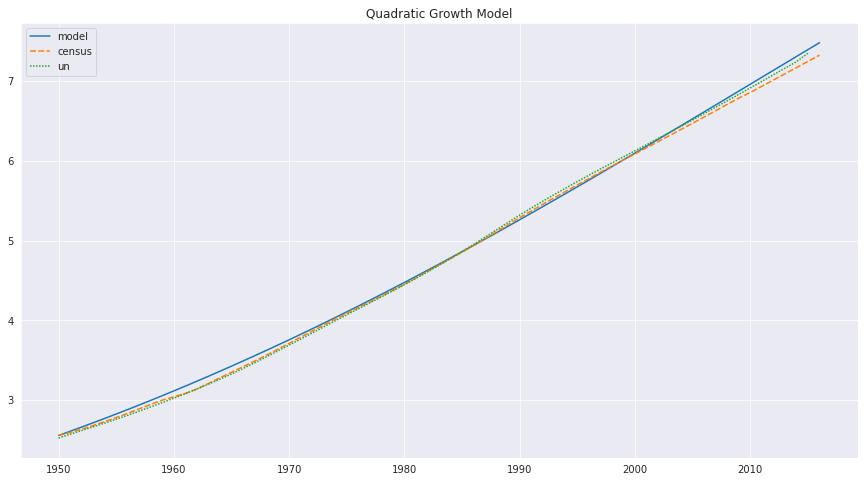

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (15,8))
sns.set_style('darkgrid')
p = sns.lineplot(data = data_combined).set(title="Quadratic Growth Model")